In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot
import folium

# Load the dataset
file_path = "/kaggle/input/world-population-growth/world-country-populations.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head() 


,population_in_2023,population_in_2022,city,country,population_growthRate,type
0,37194105,37274002,Tokyo,Japan,-0.0021,w
1,32941309,32065760,Delhi,India,0.0273,w
2,29210808,28516903,Shanghai,China,0.0243,w
3,23209616,22478117,Dhaka,Bangladesh,0.0325,w
4,22619736,22429799,Sao Paulo,Brazil,0.0085,w


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_in_2023     778 non-null    int64  
 1   population_in_2022     778 non-null    int64  
 2   city                   778 non-null    object 
 3   country                778 non-null    object 
 4   population_growthRate  778 non-null    float64
 5   type                   778 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 36.6+ KB


In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 population_in_2023       0
population_in_2022       0
city                     0
country                  0
population_growthRate    0
type                     0
dtype: int64


In [4]:
# Summary statistics for numerical columns
numerical_summary = data.describe()
print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
        population_in_2023  population_in_2022  population_growthRate
count        7.780000e+02        7.780000e+02             778.000000
mean         2.658927e+06        2.607826e+06               0.020758
std          3.700349e+06        3.638665e+06               0.013135
min          7.500970e+05        7.231140e+05              -0.034800
25%          9.921812e+05        9.657890e+05               0.012625
50%          1.381252e+06        1.362342e+06               0.019950
75%          2.607130e+06        2.548158e+06               0.028675
max          3.719410e+07        3.727400e+07               0.061100


In [5]:
data.describe()

,population_in_2023,population_in_2022,population_growthRate
count,7.780000e+02,7.780000e+02,778.000000
mean,2.658927e+06,2.607826e+06,0.020758
std,3.700349e+06,3.638665e+06,0.013135
min,7.500970e+05,7.231140e+05,-0.034800
25%,9.921812e+05,9.657890e+05,0.012625
50%,1.381252e+06,1.362342e+06,0.019950
75%,2.607130e+06,2.548158e+06,0.028675
max,3.719410e+07,3.727400e+07,0.061100


**What is the distribution of population growth rates?**

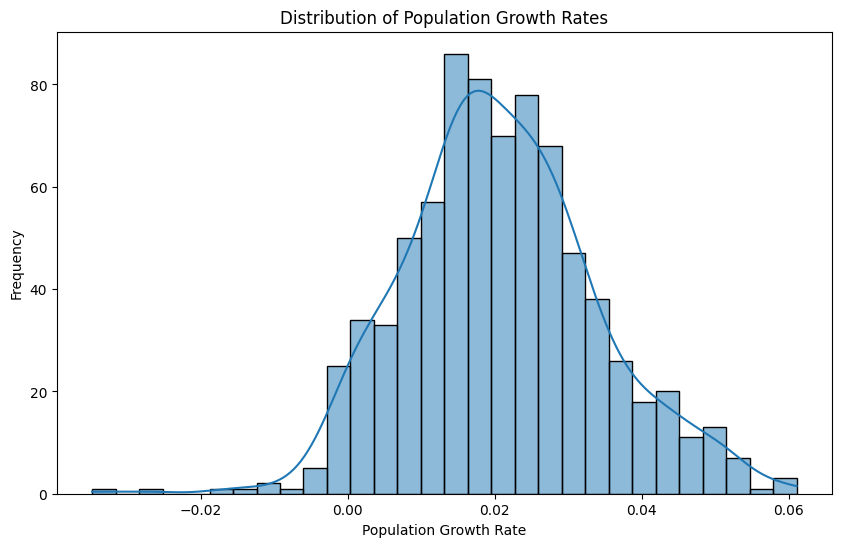

In [6]:
# Distribution of population growth rates
plt.figure(figsize=(10, 6))
sns.histplot(data['population_growthRate'], bins=30, kde=True)
plt.title('Distribution of Population Growth Rates')
plt.xlabel('Population Growth Rate')
plt.ylabel('Frequency')
plt.show()


**How does the population growth vary across countries?**

In [7]:
# Population growth across countries
fig = px.bar(data, x='country', y='population_growthRate', color='country',
             title='Population Growth Rate Across Countries')
fig.show()


**How has the overall population changed from 2022 to 2023?**

In [8]:
# Calculate total population for each year
total_population_2022 = data['population_in_2022'].sum()
total_population_2023 = data['population_in_2023'].sum()

# Display the change in population
print(f"Total Population in 2022: {total_population_2022}")
print(f"Total Population in 2023: {total_population_2023}")
print(f"Population Change from 2022 to 2023: {total_population_2023 - total_population_2022}")


Total Population in 2022: 2028888987
Total Population in 2023: 2068645432
Population Change from 2022 to 2023: 39756445


**What is the correlation between population and population growth rate?**

In [9]:
# Correlation matrix
correlation_matrix = data[['population_in_2023', 'population_growthRate']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       population_in_2023  population_growthRate
population_in_2023               1.000000              -0.054863
population_growthRate           -0.054863               1.000000


**Can we visualize the top cities with the highest population growth rates?**

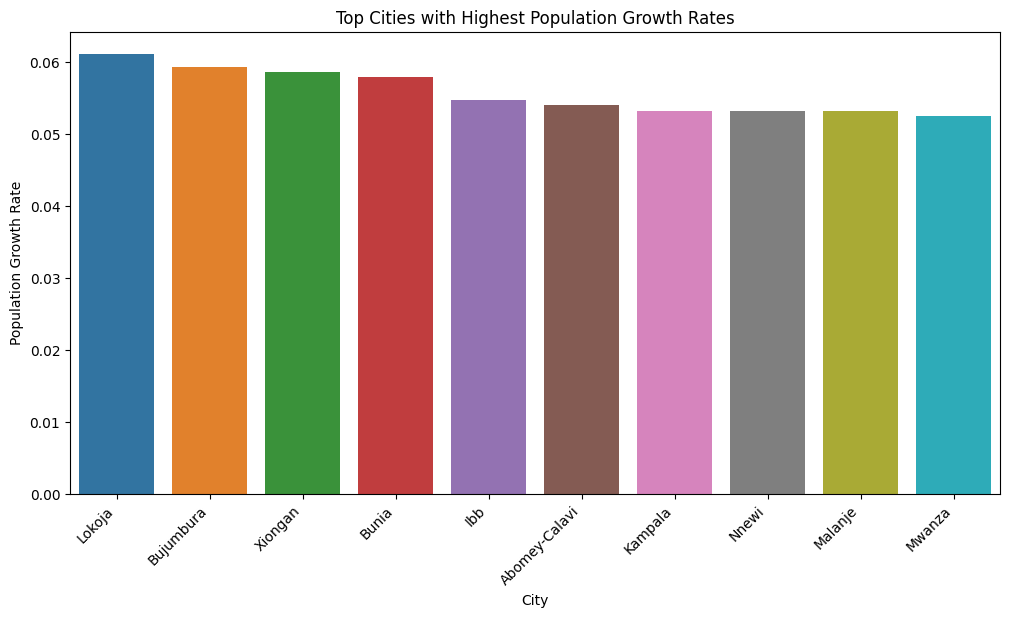

In [10]:
# Top cities with highest population growth rates
top_cities_growth = data.nlargest(10, 'population_growthRate')

# Bar chart for top cities with highest growth rates
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='population_growthRate', data=top_cities_growth)
plt.title('Top Cities with Highest Population Growth Rates')
plt.xlabel('City')
plt.ylabel('Population Growth Rate')
plt.xticks(rotation=45, ha='right')
plt.show()


**Is there a relationship between city type and population growth?**

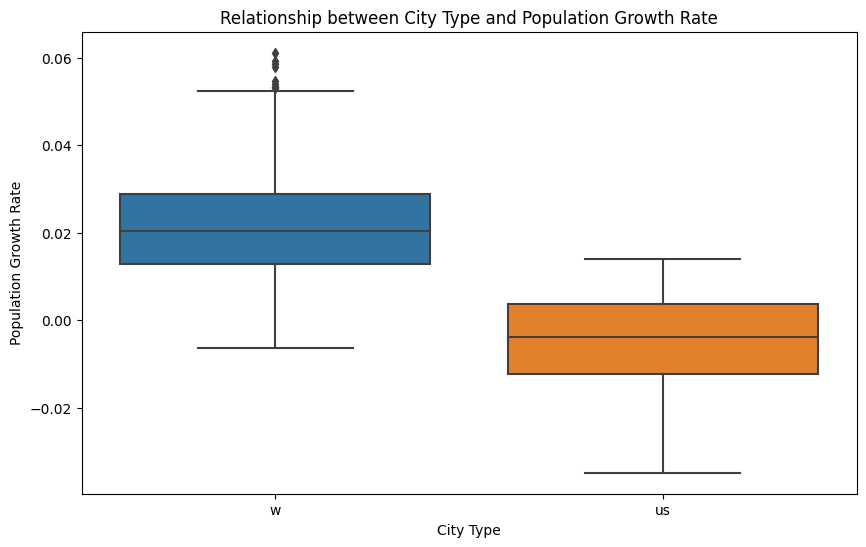

In [11]:
# Relationship between city type and population growth
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='population_growthRate', data=data)
plt.title('Relationship between City Type and Population Growth Rate')
plt.xlabel('City Type')
plt.ylabel('Population Growth Rate')
plt.show()


**How does the population growth rate vary over time?**

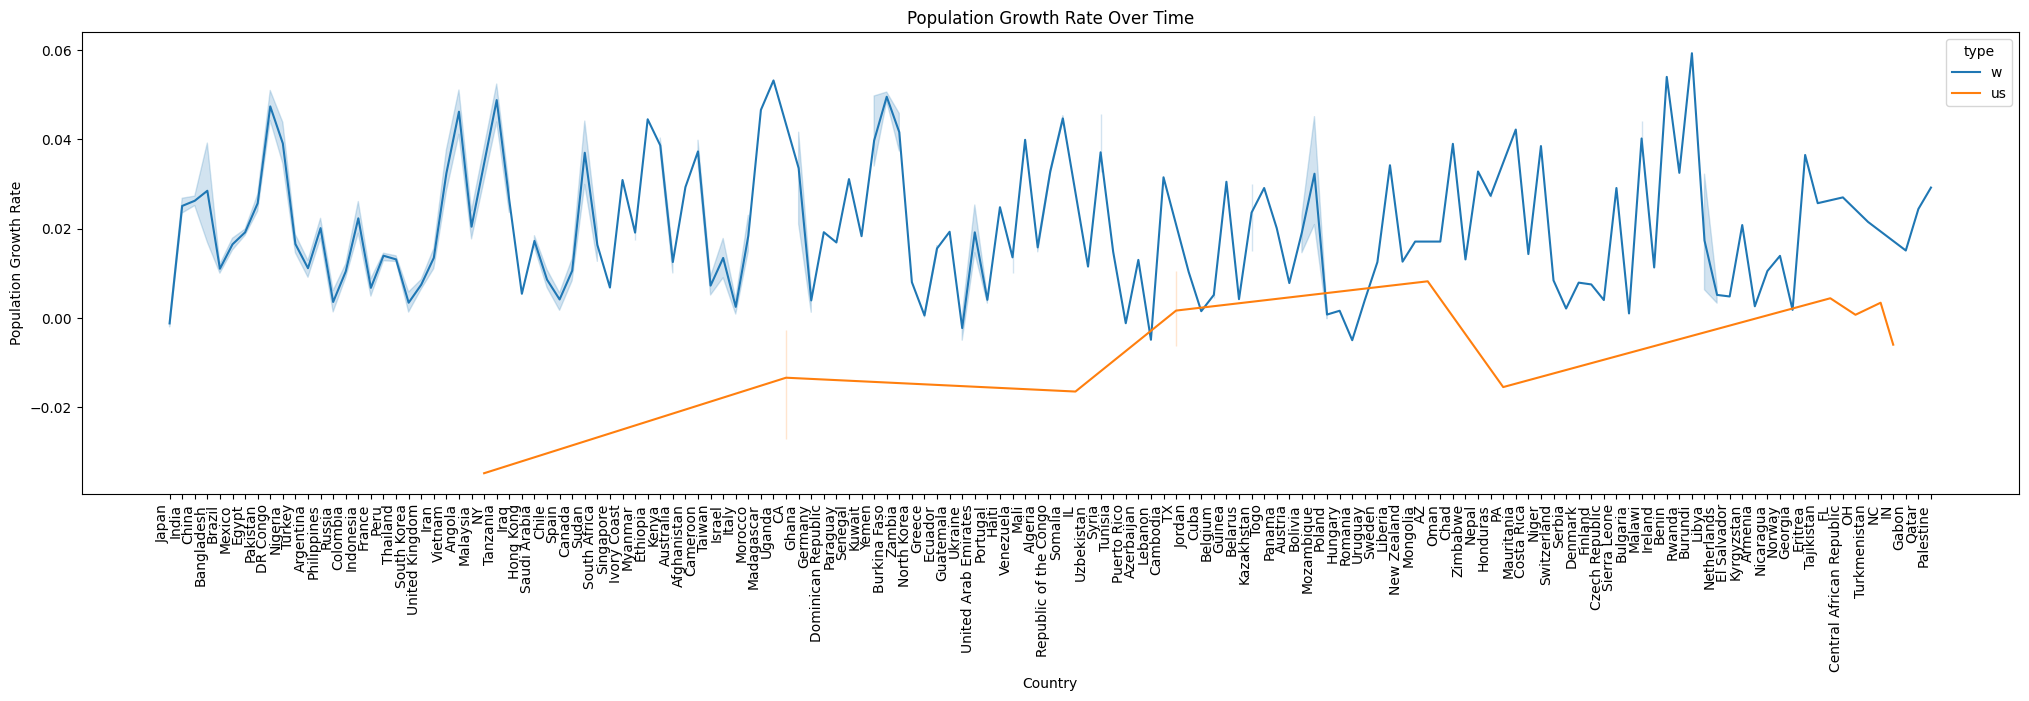

In [12]:
# Line plot of population growth rate over time
plt.figure(figsize=(25, 6))
sns.lineplot(x='country', y='population_growthRate', hue='type', data=data)
plt.title('Population Growth Rate Over Time')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.xticks(rotation=90, ha='right')
plt.show()


**Can we visualize the population growth rate on a world map?**

In [13]:
import plotly.express as px

# Assuming 'data' is your DataFrame
# Ensure that 'population_growthRate' column only contains valid numerical values
data['population_growthRate'] = data['population_growthRate'].apply(lambda x: max(x, 0))

# World map visualization using Plotly Express
fig = px.scatter_geo(data, 
                     locations="country", 
                     locationmode="country names", 
                     color="population_growthRate",
                     hover_name="country", 
                     size="population_growthRate", 
                     projection="natural earth",
                     title="World Map of Population Growth Rate")

fig.show()


**Are there any outliers in the population growth rates?**

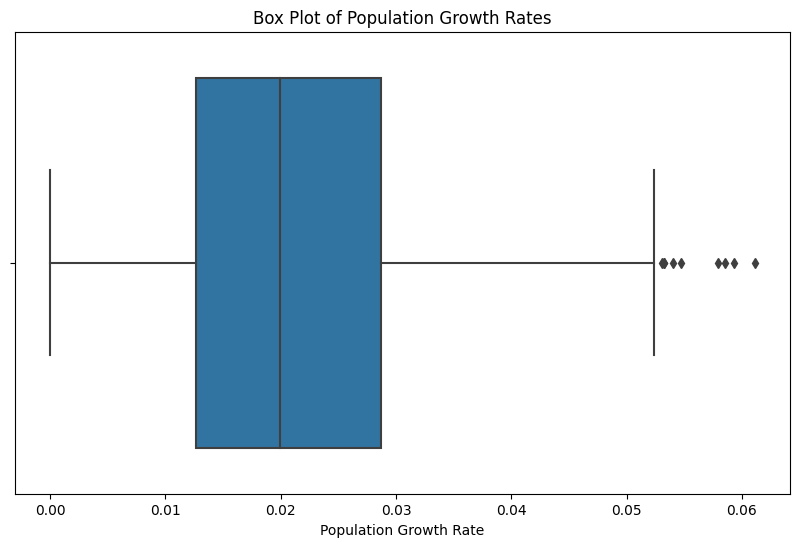

In [14]:
# Box plot to identify outliers in population growth rates
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['population_growthRate'])
plt.title('Box Plot of Population Growth Rates')
plt.xlabel('Population Growth Rate')
plt.show()


**What is the distribution of city types in the dataset?**

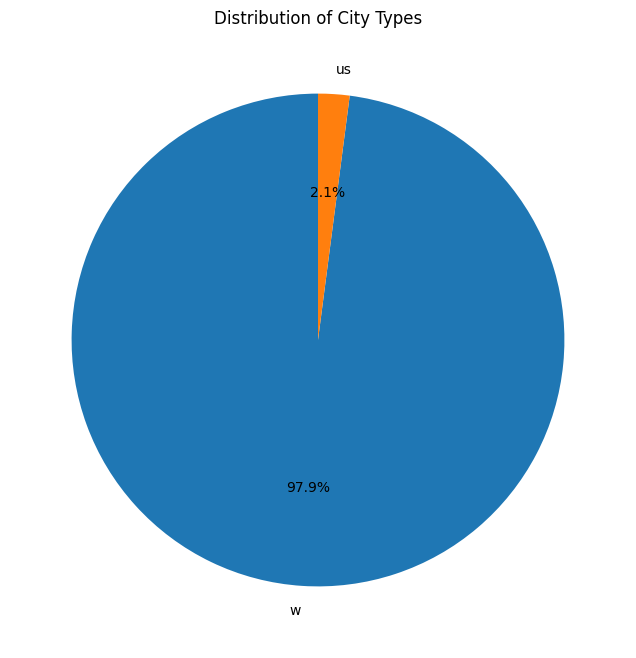

In [15]:
# Pie chart for distribution of city types
city_type_distribution = data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_type_distribution, labels=city_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of City Types')
plt.show()


**How does the population growth rate correlate with the city's population size?**

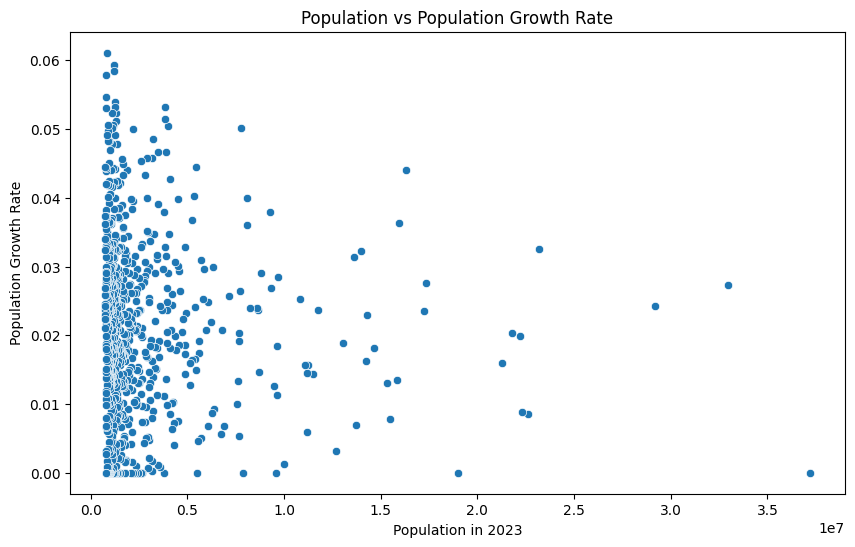

In [16]:
# Scatter plot to show the correlation between population and growth rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_in_2023', y='population_growthRate', data=data)
plt.title('Population vs Population Growth Rate')
plt.xlabel('Population in 2023')
plt.ylabel('Population Growth Rate')
plt.show()


**What are the top countries with the highest population in 2023?**

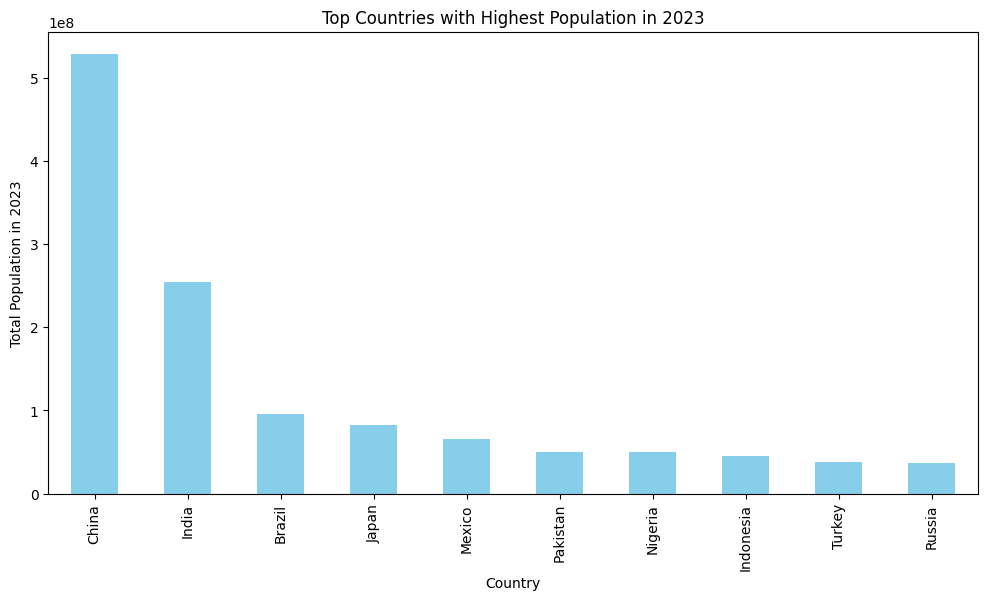

In [17]:
# Top countries with highest population in 2023
top_countries_population = data.groupby('country')['population_in_2023'].sum().nlargest(10)

# Bar chart for top countries with highest population
plt.figure(figsize=(12, 6))
top_countries_population.plot(kind='bar', color='skyblue')
plt.title('Top Countries with Highest Population in 2023')
plt.xlabel('Country')
plt.ylabel('Total Population in 2023')
plt.show()


**How does the population growth rate vary among different city types?**

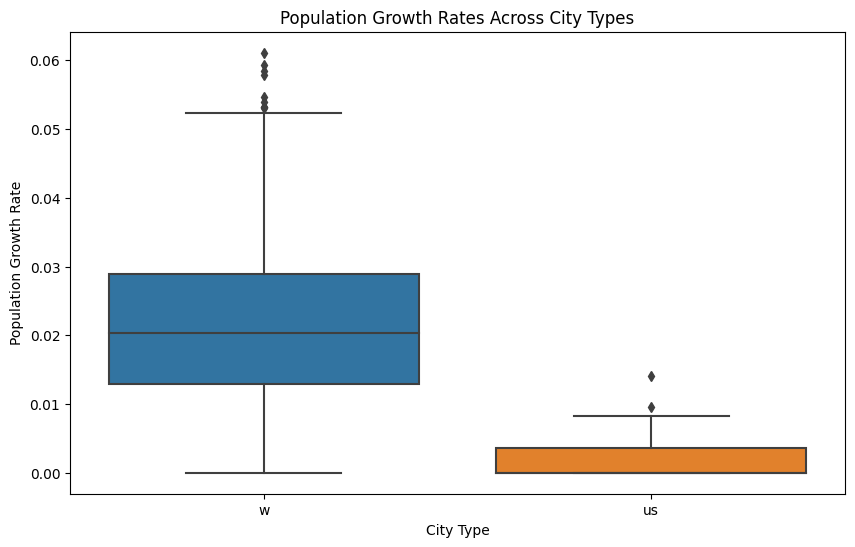

In [18]:
# Box plot for population growth rates across city types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='population_growthRate', data=data)
plt.title('Population Growth Rates Across City Types')
plt.xlabel('City Type')
plt.ylabel('Population Growth Rate')
plt.show()


**Can we explore the correlation between population growth rate and population for different city types?**

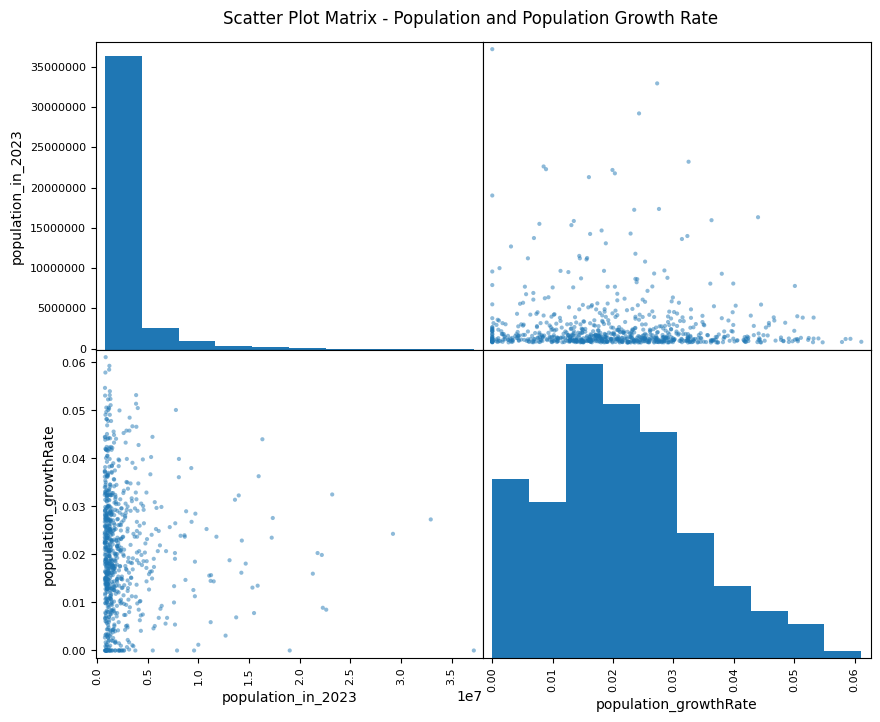

In [19]:
# Scatter plot matrix for correlation exploration
scatter_matrix = pd.plotting.scatter_matrix(data[['population_in_2023', 'population_growthRate']], figsize=(10, 8))
plt.suptitle('Scatter Plot Matrix - Population and Population Growth Rate', y=0.92)
plt.show()
 

**What is the proportion of each city type within each country?**

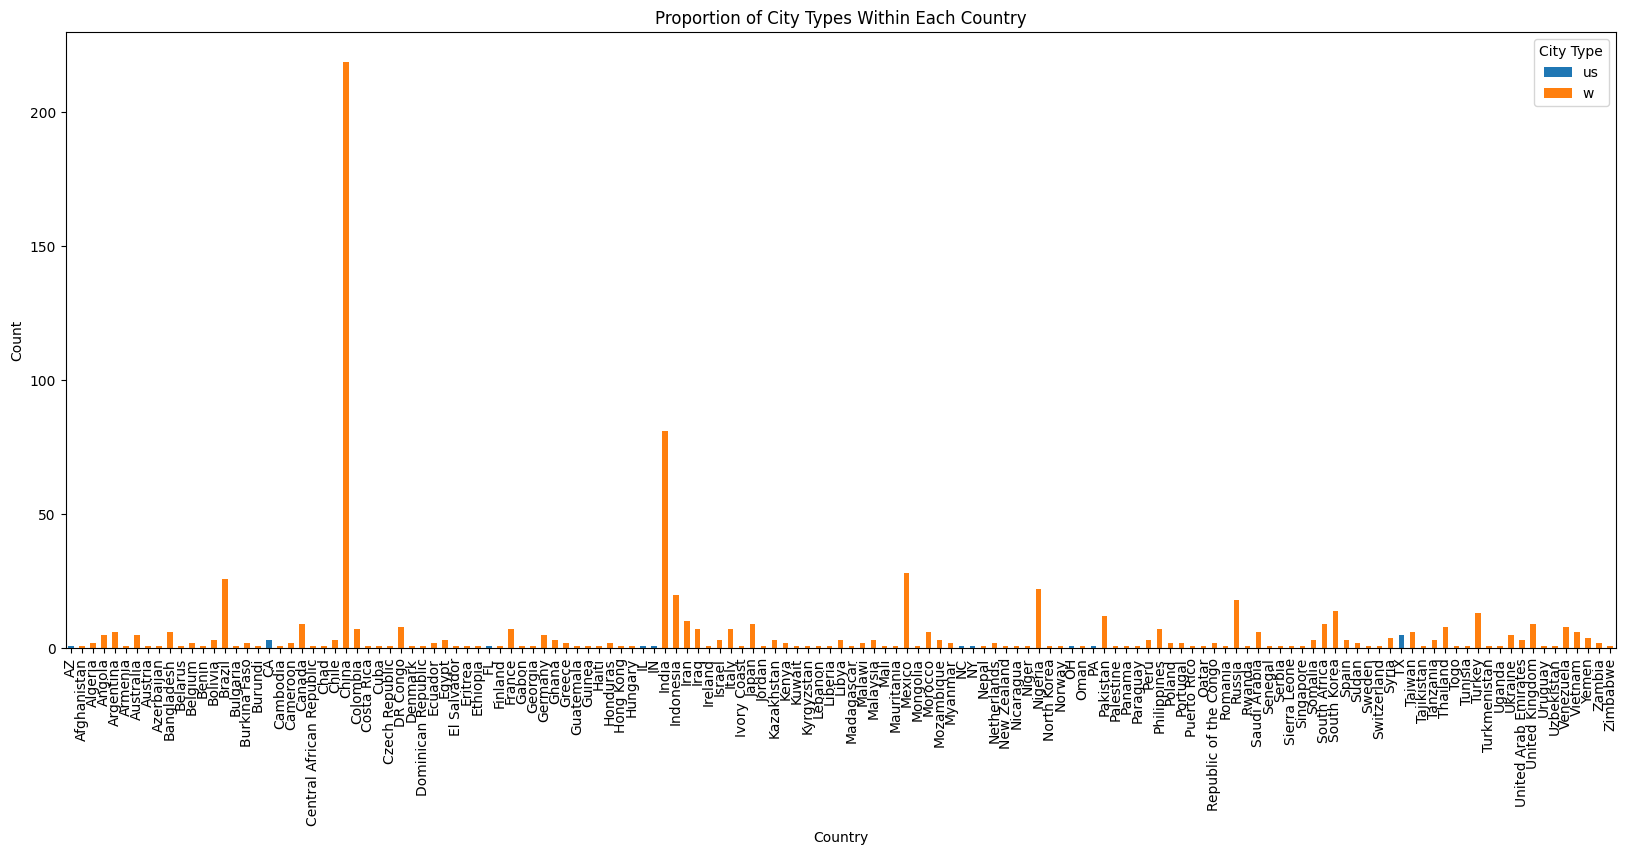

In [20]:
# Stacked bar chart for proportion of city types within each country
stacked_bar_data = data.groupby(['country', 'type']).size().unstack()
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Proportion of City Types Within Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='City Type')
plt.show()


**What is the overall trend in population growth rate over the years?**

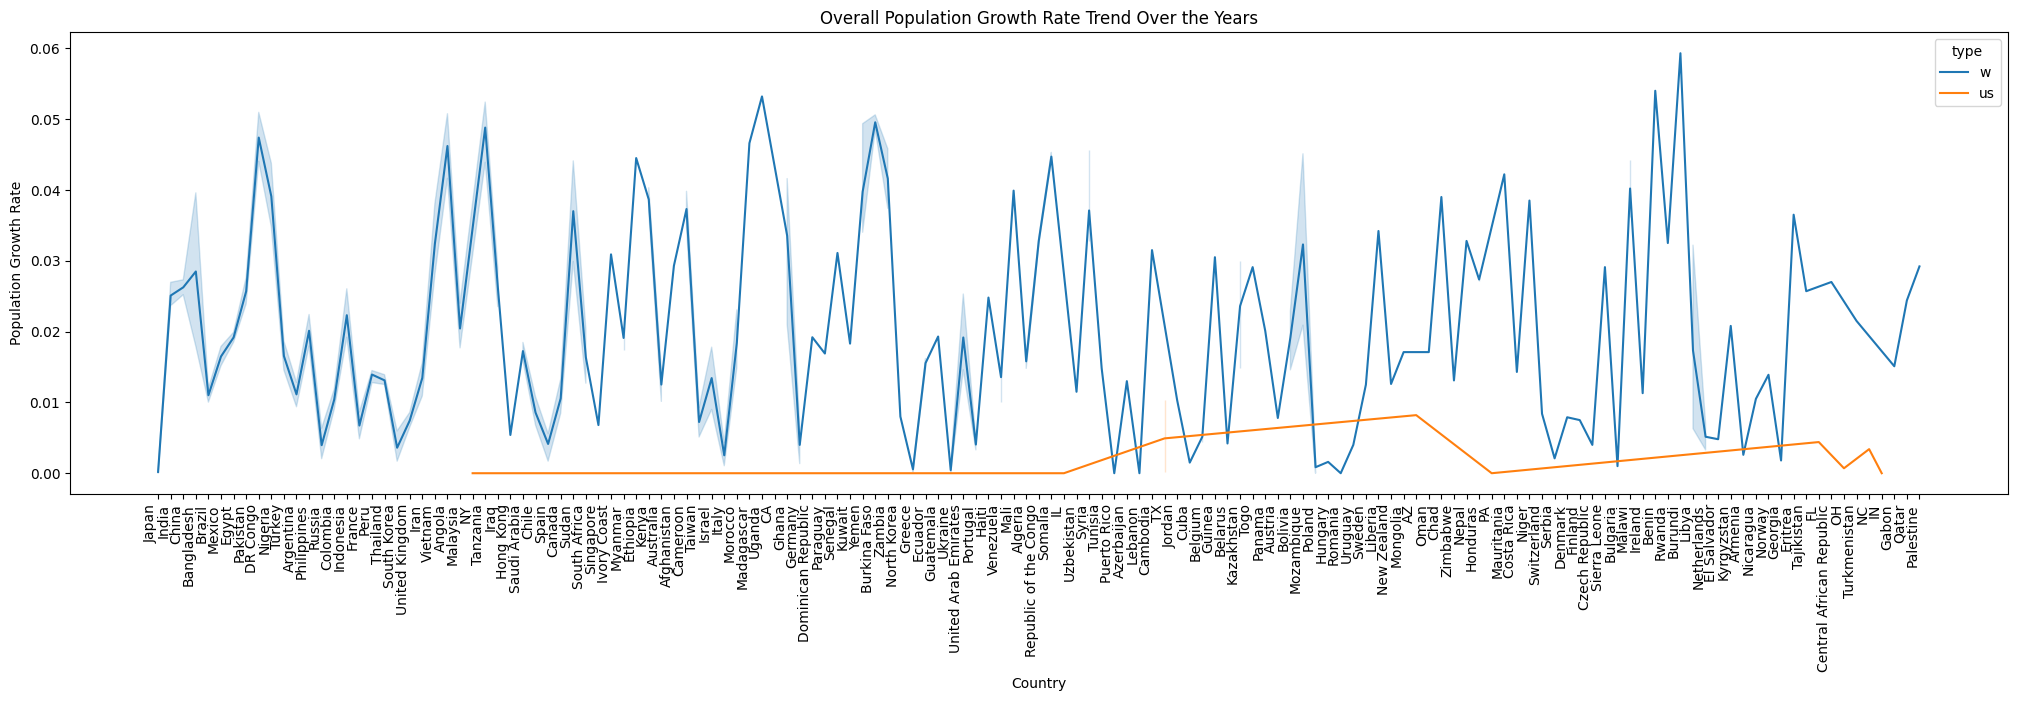

In [21]:
# Line plot for overall population growth rate trend over the years
plt.figure(figsize=(25, 6))
sns.lineplot(x='country', y='population_growthRate', hue='type', data=data)
plt.title('Overall Population Growth Rate Trend Over the Years')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.xticks(rotation=90, ha='right')
plt.show()


**How does the distribution of population growth rates differ between urban and rural areas?**

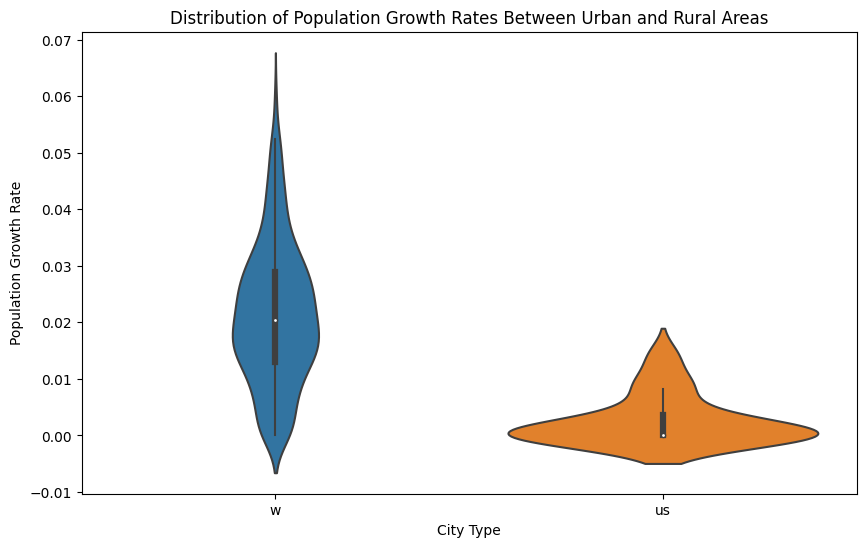

In [22]:
# Violin plot for distribution of population growth rates between urban and rural areas
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='population_growthRate', data=data)
plt.title('Distribution of Population Growth Rates Between Urban and Rural Areas')
plt.xlabel('City Type')
plt.ylabel('Population Growth Rate')
plt.show()


**Can we create a choropleth map to visualize the global population growth rate?**

In [23]:
# Choropleth map using Plotly Express
fig = px.choropleth(data, locations="country", locationmode="country names", color="population_growthRate",
                    hover_name="country", title="Global Choropleth Map of Population Growth Rate",
                    projection="natural earth", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


**What is the average population growth rate for each city type?**

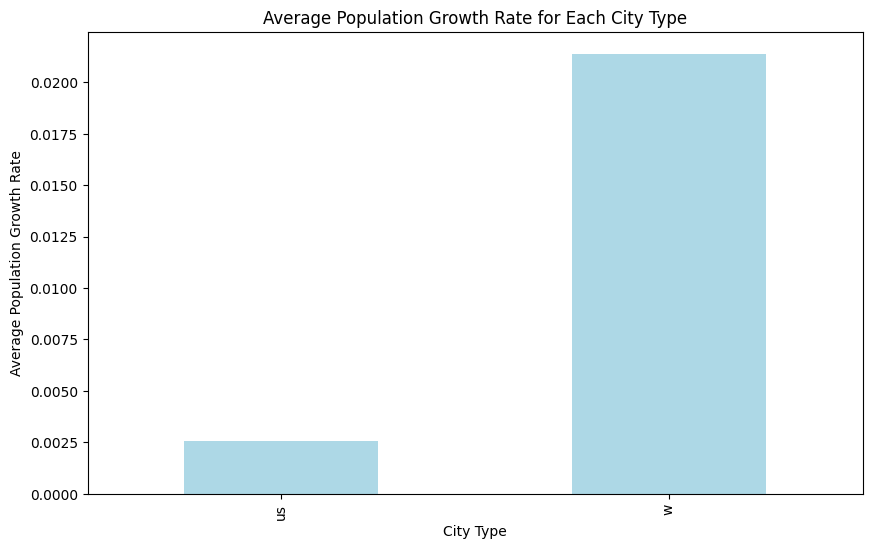

In [24]:
# Bar chart for average population growth rate for each city type
average_growth_by_type = data.groupby('type')['population_growthRate'].mean()
plt.figure(figsize=(10, 6))
average_growth_by_type.plot(kind='bar', color='lightblue')
plt.title('Average Population Growth Rate for Each City Type')
plt.xlabel('City Type')
plt.ylabel('Average Population Growth Rate')
plt.show()


**What is the relationship between population size and growth rate for different countries?**

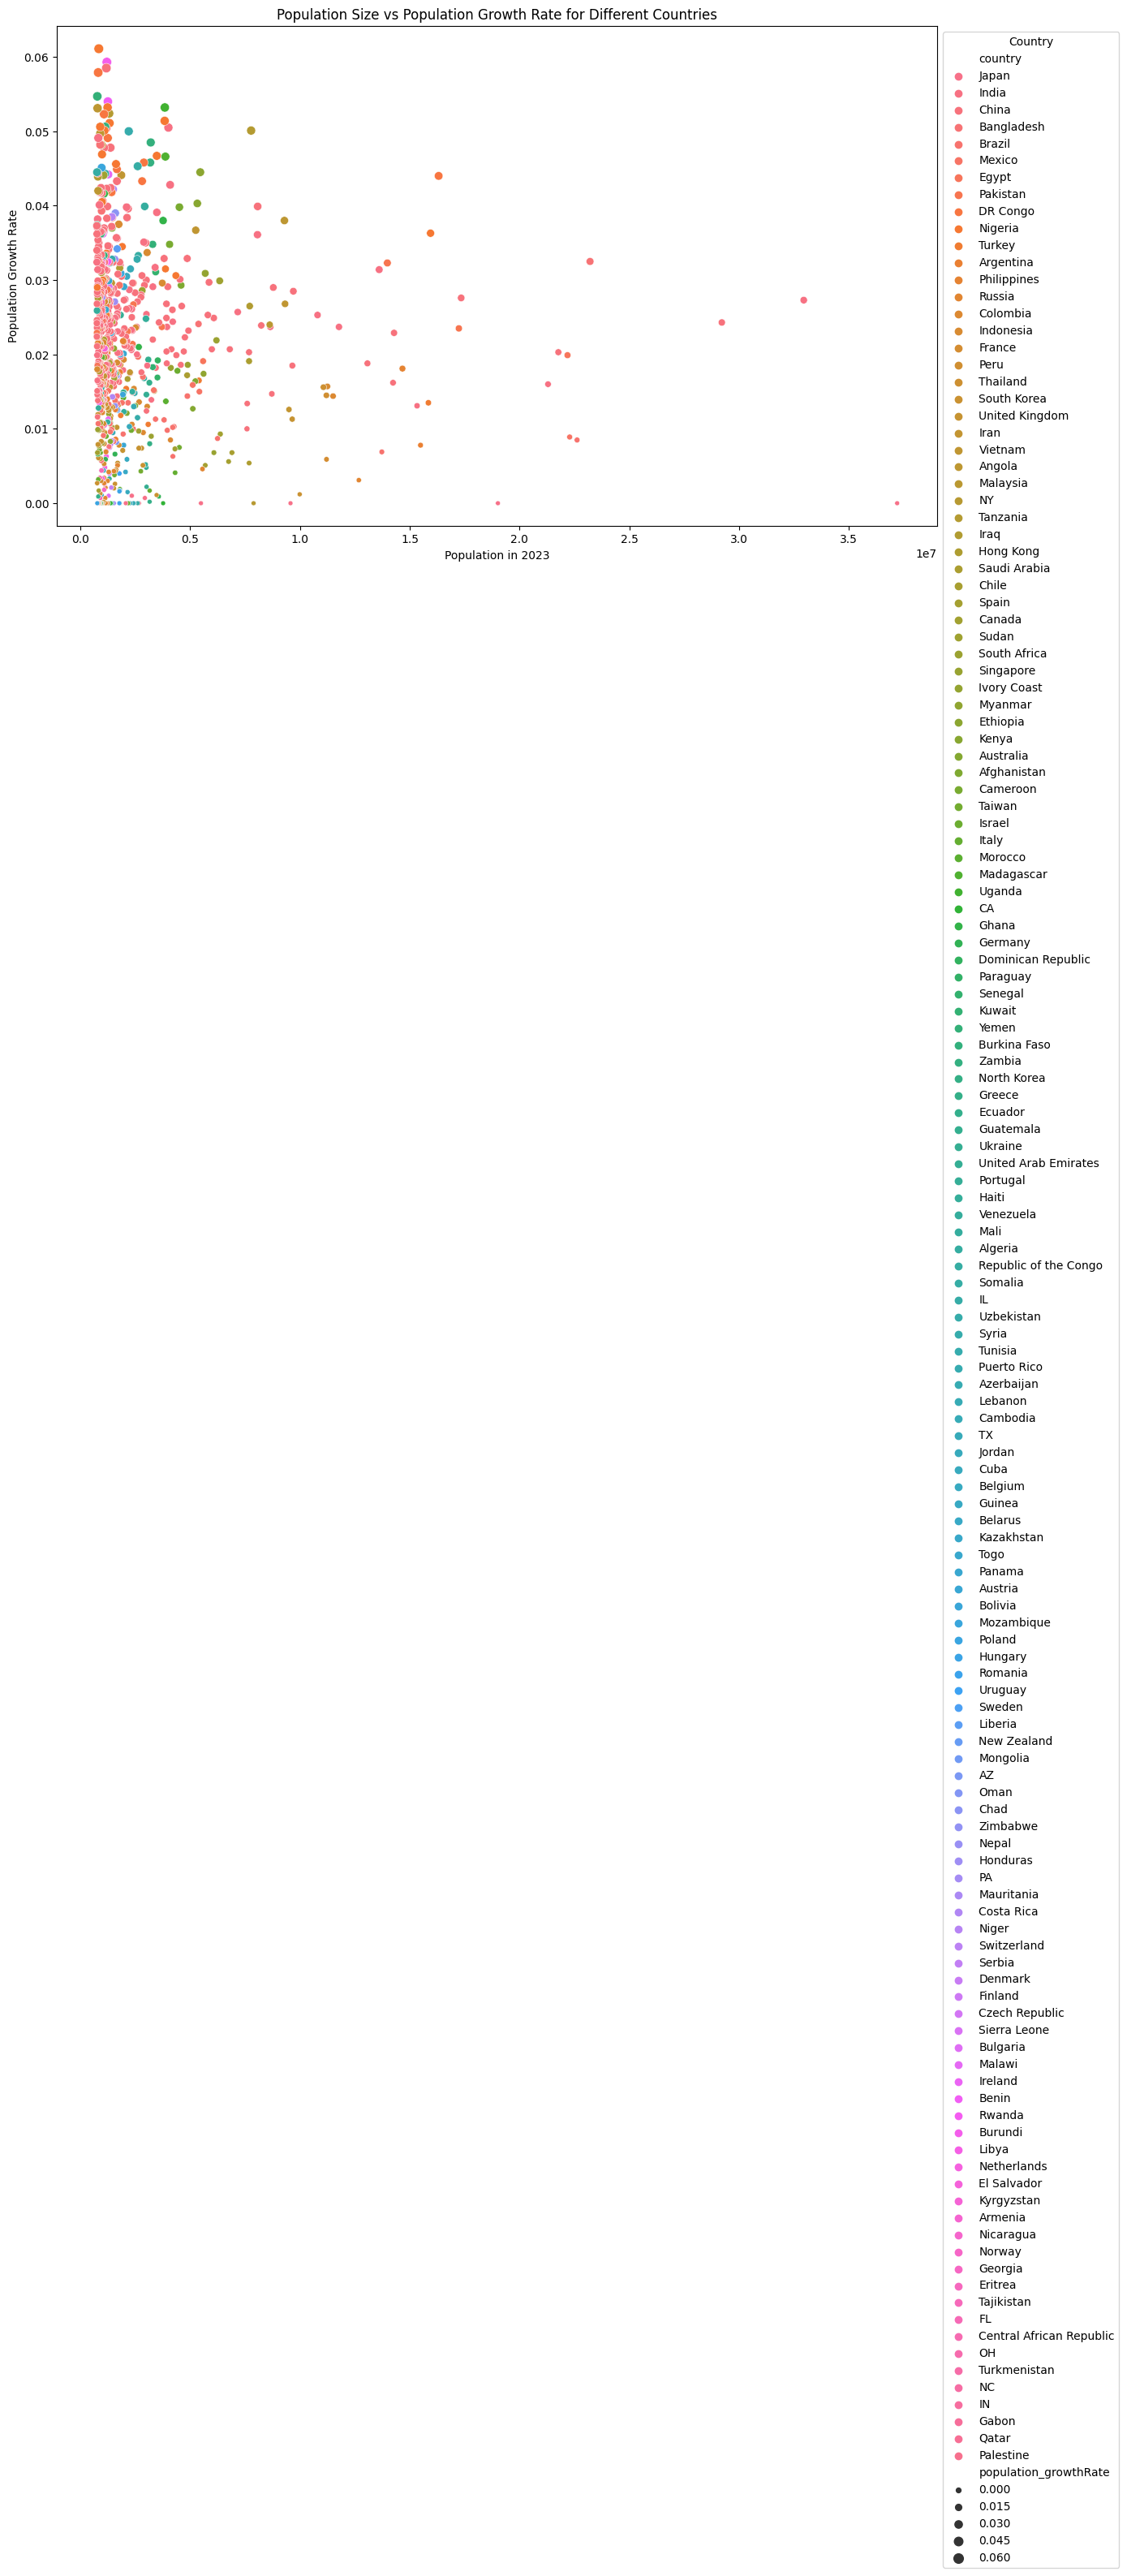

In [25]:
# Bubble plot for relationship between population size and growth rate for different countries
plt.figure(figsize=(14, 8))
sns.scatterplot(x='population_in_2023', y='population_growthRate', hue='country', size='population_growthRate', data=data)
plt.title('Population Size vs Population Growth Rate for Different Countries')
plt.xlabel('Population in 2023')
plt.ylabel('Population Growth Rate')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()


**Can we visualize the population growth rate trends over the years using a line chart?**

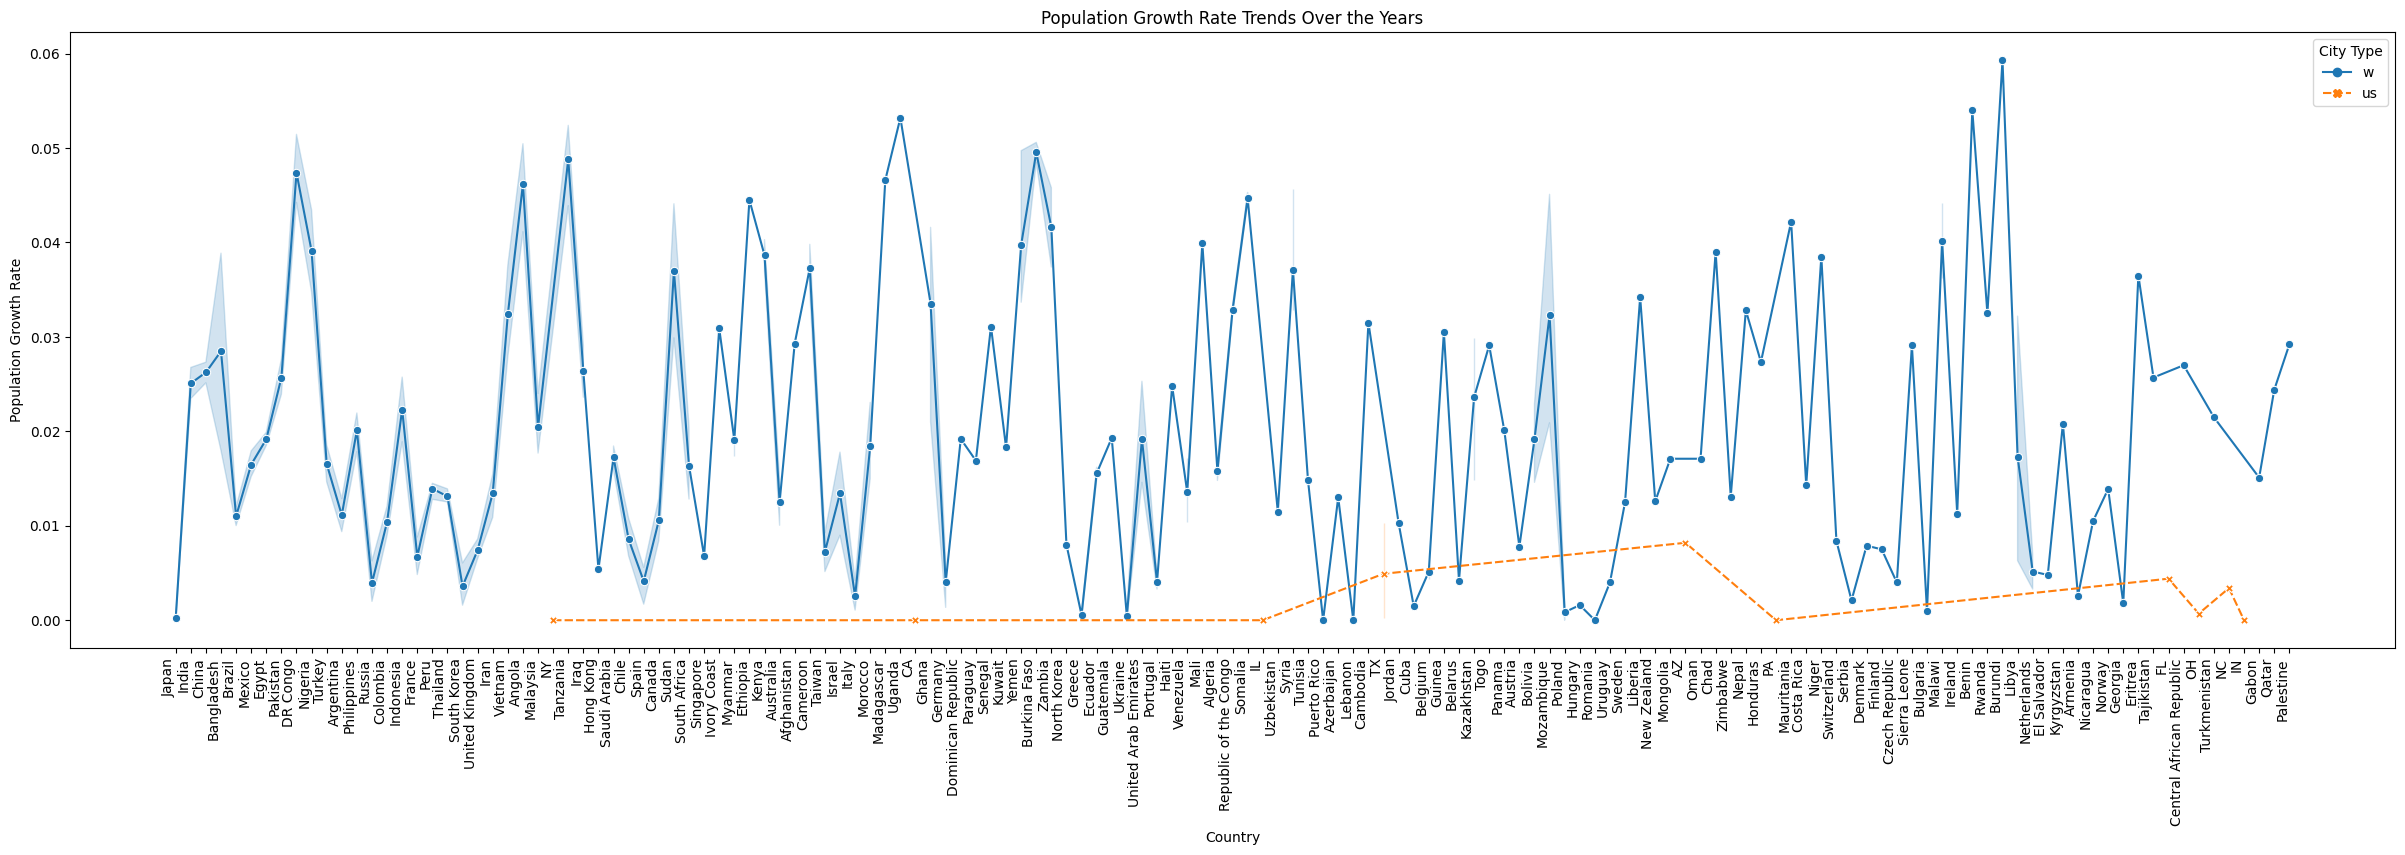

In [26]:
# Line chart for population growth rate trends over the years
plt.figure(figsize=(30, 8))
sns.lineplot(x='country', y='population_growthRate', hue='type', style='type', markers=True, data=data)
plt.title('Population Growth Rate Trends Over the Years')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.xticks(rotation=90, ha='right')
plt.legend(title='City Type', bbox_to_anchor=(1, 1))
plt.show()


**What are the top 10 cities with the highest population in 2023?**

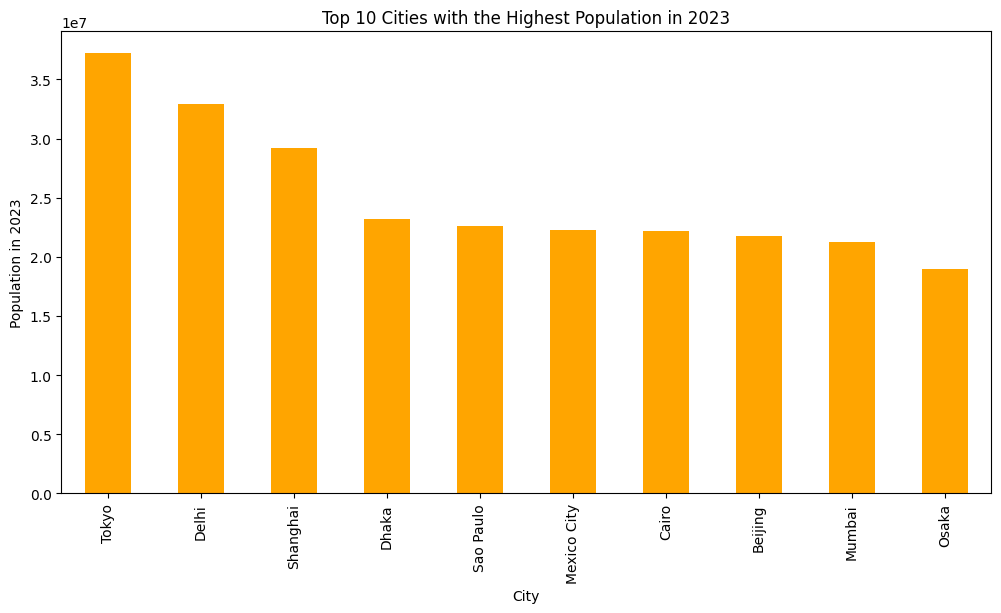

In [27]:
# Top 10 cities with the highest population in 2023
top_cities_population_2023 = data.groupby('city')['population_in_2023'].max().nlargest(10)

# Bar chart for top 10 cities with the highest population in 2023
plt.figure(figsize=(12, 6))
top_cities_population_2023.plot(kind='bar', color='orange')
plt.title('Top 10 Cities with the Highest Population in 2023')
plt.xlabel('City')
plt.ylabel('Population in 2023')
plt.show()


**Can we visualize the population growth rate trends using an animated line chart over the years?**

In [28]:
# Animated line chart for population growth rate trends over the years
fig = px.line(data, x='country', y='population_growthRate', animation_frame='type',
              title='Animated Line Chart for Population Growth Rate Trends Over the Years')
fig.show()
